# Computer Vision - P3_2


## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **English**.

- The deliverable must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 26th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

In Video Segmentation:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

In Image Segmentation:

3.3. Segmentation of images.

To successfuly complete this practicum it is necessary to understand the following theory concepts: video segmentation, background subtraction, K-means clustering, different image segmentation approaches,...

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



In [1]:
# imports we will need in the notebook:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.util import img_as_float
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries
from skimage.transform import resize, rescale

## 3.3 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

### Felzenszwalb's efficient graph based segmentation

a) Read 'rocki.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.


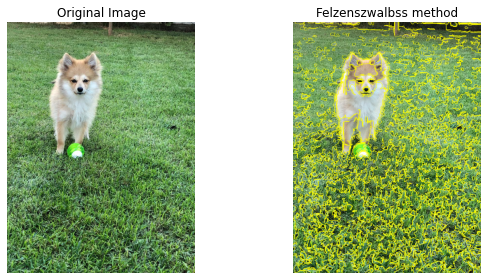

In [2]:
%matplotlib inline
# We read the image
img = io.imread("images/rocki.jpeg")
# Let's to apply the algorithm
segments_fz = felzenszwalb(img, scale=100, sigma=2, min_size=50) # default scale=1, sigma=0.8, min_size=20

# To visualize the images
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(mark_boundaries(img, segments_fz))
ax[1].set_title('Felzenszwalbss method')
ax[1].axis('off')

plt.tight_layout()
plt.show()

b) Test and explore different parameters in order to obtain a good image segmentation up to you. 
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values according to your subjective perception?
- How does each parameter behave?

Note: You can reduce the size of the image in order to accelerate the running. Does the image reduction affect the optimal values? 



In [3]:
img = img_as_float(img)
print("Details:", img.shape, img.dtype, img.min(), img.max())

Details: (1024, 768, 3) float64 0.0 1.0


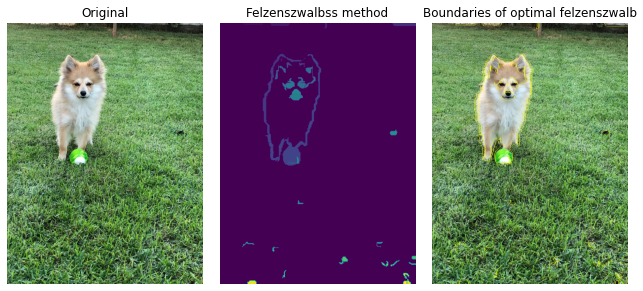

Details: (1024, 768) int64 0 30


In [4]:
# Segment with different parameters
segments_fz  = felzenszwalb(img, scale=500, sigma=5, min_size=100)

# To visualize the images
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(segments_fz)
ax[1].set_title('Felzenszwalbss method')
ax[1].axis('off')
ax[2].imshow(mark_boundaries(img, segments_fz))
ax[2].set_title('Boundaries of optimal felzenszwalb')
ax[2].axis('off')

plt.tight_layout()
plt.show()
print("Details:", segments_fz.shape, segments_fz.dtype, segments_fz.min(), segments_fz.max())

**R:** It is not necessary to convert the image into grayscale or in float. <br>It makes a good segmentation with a scale of 500, a sigma of 3 and a 100 minimum size. 
The parameter scale sets an observation level, sigma is the diameter of a Gaussian kernel, sigma is used for smoothing the image prior to segmentation, and min_size controls the number of produced segments as well as their size.


No, because the algorithm implements multichannel processing by default (multichannel=True).<br>
No, because the image is rescaled to be in [0, 1] prior to processing.<br>

**scale:** modifying this value, we can control the number of produced segments and their size. Higher scale means less and larger segments

**sigma:** modifying this value, we can change the width of the Gaussian kernel. As higher this value is, the clusters will be larger, as the image will be smoother.

**min_size:** this value changes the minimum component size. Increasing this value will make clusters to be larger.


We consider that the optimal values are those of the original image (the last one is almost identical) because we are focusing on the segmentation that finds the different colors of the image.

This algorithm is a graph based segmentation algorithm. Produces an oversegmentation of a multichannel (i.e. RGB) image using a fast, minimum spanning tree based clustering on the image grid. It measures the evidence for a boundary between two regions. It uses greedy solutions, but still the result is good enough to segmentate an image. For RGB images, the algorithm uses the euclidean distance between pixels in color space.

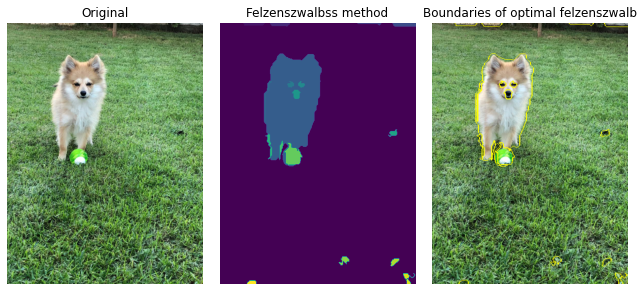

In [5]:
# Let's reduce the size of the image
img_rescaled = rescale(img, 0.5, anti_aliasing=True, multichannel=True)
segments_fz_reduced = felzenszwalb(img_rescaled, scale=500, sigma=3, min_size=100)

# To visualize the images
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
ax = axes.ravel()

ax[0].imshow(img_rescaled)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(segments_fz_reduced)
ax[1].set_title('Felzenszwalbss method')
ax[1].axis('off')
ax[2].imshow(mark_boundaries(img_rescaled, segments_fz_reduced))
ax[2].set_title('Boundaries of optimal felzenszwalb')
ax[2].axis('off')

plt.tight_layout()
plt.show()

As we can see, the image reduction affect the segmentation because we lose information and accuracy when we rescale the image to a reduced size. But we improve the processing time.

c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

**R:** SLIC is a graph based segmentation algorithm. Produces an oversegmentation of a multichannel (i.e. RGB) image using a fast, minimum spanning tree based clustering on the image grid. It measures the evidence for a boundary between two regions.

SLIC: Fast, minimum spanning tree based clustering on the image grid.
Preserves small components and areas of slow change in intensity get missegmented into one
component.

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

<ipython-input-6-c32ae0b912eb>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic = slic(img) #, start_label=1) # default n_segments=100, compactness=10.0, max_num_iter=10, sigma=0


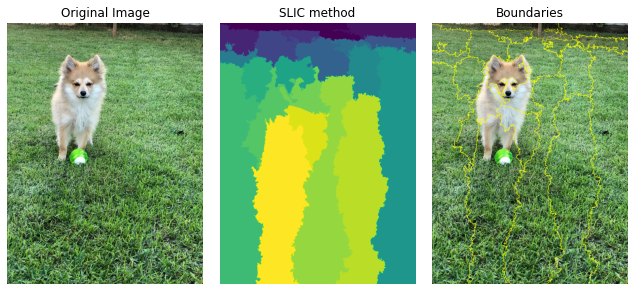

Details: (1024, 768) int64 0 19


In [6]:
# Let's to apply the algorithm
segments_slic = slic(img) #, start_label=1) # default n_segments=100, compactness=10.0, max_num_iter=10, sigma=0

# To visualize the images
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segments_slic)
ax[1].set_title('SLIC method')
ax[1].axis('off')
ax[2].imshow(mark_boundaries(img, segments_slic))
ax[2].set_title('Boundaries')
ax[2].axis('off')

plt.tight_layout()
plt.show()

print("Details:", segments_slic.shape, segments_slic.dtype, segments_slic.min(), segments_slic.max())

e) Explore what are the parameters of the slic function. Test different values for these parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values of the optional valriables?
- How does each parameter behave?

<ipython-input-7-20b16ec4eb1d>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic = slic(img, n_segments=10, compactness=10, sigma=3) #, start_label=1)


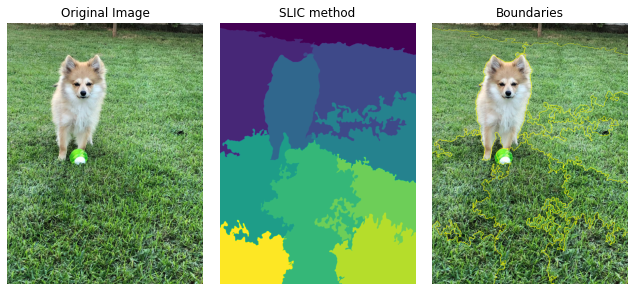

Details: (1024, 768) int64 0 9


In [7]:
# Let's to apply the algorithm
segments_slic = slic(img, n_segments=10, compactness=10, sigma=3) #, start_label=1)

# To visualize the images
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segments_slic)
ax[1].set_title('SLIC method')
ax[1].axis('off')
ax[2].imshow(mark_boundaries(img, segments_slic))
ax[2].set_title('Boundaries')
ax[2].axis('off')

plt.tight_layout()
plt.show()

print("Details:", segments_slic.shape, segments_slic.dtype, segments_slic.min(), segments_slic.max())

**R:** It is not necessary to convert the image into grayscale or in float. 
The optimal values for a better segmentation are a number of 100 segments, 10 for compactness an a 5 sigma. 
The n_segments is the number of centers for kmeans, the compactness determines the ratio between spatial and color 
parameters ratio and sigma determines smoothing of the image before processing.

**n_segments:** the result will have more or less segments depending on this value. The value is the actual number of segments.<br>
**sigma:** modifying this value, we can change the width of the Gaussian kernel. As higher this value is, the clusters will be larger, as the image will be smoother.<br>
**compactness:** this value balances color proximity and space proximity. Higher values give more weight to space proximity. Lower values -> Larger clusters <br>

In this case, we consider that the optimal values are the ones at the third image. The optimal values are those that represent each part of the colors from the parrot.

f) Comment what the algorithm is (in up to 3 lines).

SLIC is an algorithm that performs K-means in the 5d space of color information and spatial information (image location). As the clustering method is simpler, it is very efficient. It is essential for this algorithm to work in color space to obtain good results. 

### Quickshift image segmentation

g) Segment the same image using the Quickshift algorithm. 

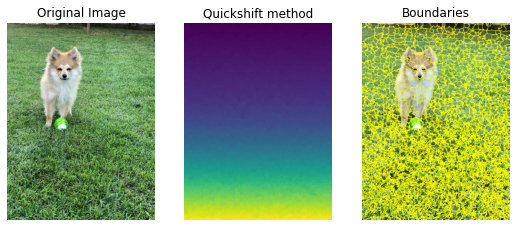

In [8]:
# Let's to apply the algorithm
segments_quick = quickshift(img) # default kernel_size=5, max_dist=10, ratio=1.0, sigma=0

# To visualize the images
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segments_quick)
ax[1].set_title('Quickshift method')
ax[1].axis('off')
ax[2].imshow(mark_boundaries(img, segments_quick))
ax[2].set_title('Boundaries')
ax[2].axis('off')

plt.show()

h) Test different parameters in order to obtain a good image segmentation with Quickshift algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

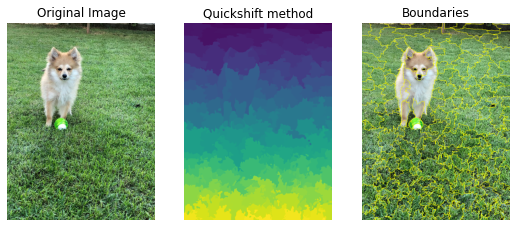

In [9]:
# Let's test different parameters
segments_quick = quickshift(img, kernel_size=10, max_dist=100, ratio=5, sigma=3)

# To visualize the images
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segments_quick)
ax[1].set_title('Quickshift method')
ax[1].axis('off')
ax[2].imshow(mark_boundaries(img, segments_quick))
ax[2].set_title('Boundaries')
ax[2].axis('off')

plt.show()

**kernel_size:** width of Gaussian kernel used in smoothing the sample density. Higher means fewer clusters.<br>
**sigma:** modifying this value, we can change the width of the Gaussian kernel. As higher this value is, the clusters will be larger, as the image will be smoother.<br>
**max_dist:** Cut-off point for data distances. Higher means fewer clusters.<br>
**ratio:** Balances color-space proximity and image-space proximity. Higher values give more weight to color-space.

Note that the algorithm takes more time when increasing the value of the parameter kernel_size. This is due to the computation of the Parzen density estimation.

The optimal values are a kernel of 10, a 1 ratio and a maximum distance of 10.
Sigma, as always, determines the width for Gaussian smoothing. The kernel_size corresponds to the width of 
Gaussian kernel used in smoothing the sample density, and max_dist selects a level in the hierarchical 
segmentation that is produced.

i) Comment what the algorithm is (in up to 3 lines).

It is a 2D image segmentation algorithm, based on an approximation of kernelized mean-shift, 
applied to the 5D space consisting of color information and spatial information.

Quickshift algorithm segments image using quickshift clustering in Color-(x,y) space. This algorithm is based on an approximation of kernelized mean-shift. One of the benefits of quickshift is that it actually computes a hierarchical segmentation on multiple scales simultaneously.

### Comparison of segmentation algorithms
j) Plot the original image and the results of both algorithms in a 1x3 subplot using the optimal values.

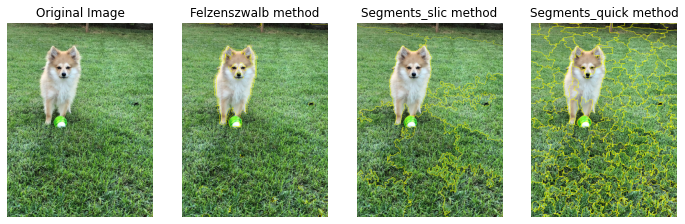

In [10]:
# To visualize the images
fig, axes = plt.subplots(1, 4, figsize=(12, 7))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(mark_boundaries(img, segments_fz))
ax[1].set_title('Felzenszwalb method')
ax[1].axis('off')
ax[2].imshow(mark_boundaries(img, segments_slic))
ax[2].set_title('Segments_slic method')
ax[2].axis('off')
ax[3].imshow(mark_boundaries(img, segments_quick))
ax[3].set_title('Segments_quick method')
ax[3].axis('off')

plt.show()

k) Calculate also the number of segments obtained on the image by each of the algorithms. Can the number of segments can be used as a criterion for the performance of the algorithms?

In [11]:
# In order to se the number of segments
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
print(f"SLIC - K-Means number of segments: {len(np.unique(segments_slic))}")
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

# The number of segments can not be used as a criterion for the performance of the algorithms
# because a large number of them does not necessary means a better segmentation.

Felzenszwalb number of segments: 31
SLIC - K-Means number of segments: 10
Quickshift number of segments: 185


l) Comment the differences between each method as well as their advantages and disadvantages.

On the one hand, we can see that as Felzenszwalb and Quickshift make a large amount of 
segments in the process, while the SLIC - K-Means algorithm make a smaller quantity. 
On the other hand, SLIC - K-Means is actually very efficient, and the principal advantatge 
of the Quickshift, is that computes a hierarchical segmentation on multiple scales simultaneously. 

The Felzenszwalb algorithm has already been explained, works by defining a weighted graph in which weights are the amount of difference between pixels.

The SLIC algorithm (Simple Linear Iterative Clustering) works by defining an amount of clusters we want to divide the original image in, calculating the average area of a cluster (total pixels / number of clusters), the average distance between cluster centers and iterating on these values until finding borders that fulfill these requisites. This method also uses a Gaussian filter.

The Quickshift algorithm is a relatively recent 2D image segmentation algorithm, based on an approximation of kernelized mean-shift. One of its benefits is that it actually computes a hierarchical segmentation on multiple scales simultaneously.

**Felzenszwalb: it is 2D-graph-based.**

(+) Efficient and quick.

(+) We can control the segment size with the "scale" parameter.

(-) Very sensitive to local contrast.
  
  
**SLIC: it is based on clustering in Color-(x,y,z) space.**

(+) We can directly control the number of centers used by k-means algorithm.

(+) We can control the relation color-similarity and proximity with the "compactness" parameter.

(-) We must decide a number of segments for the image.  
  
  
**Quickshift: it is based on clustering in Color-(x,y) space.**  

(+) Computes a hierarchical segmentation on multiple scales simultaneously

(+) We can control color-space proximity and image-space proximity balance with "ratio".

(-) Slowest algorithm of the three.

m) Choose another couple of color and grayscale images from the folder 'images' as well as from internet and apply the three segmentation methods. Comment the results.

<ipython-input-12-00f43f48be1e>:10: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic1 = slic(img1, n_segments=20, compactness=10, sigma=2)
<ipython-input-12-00f43f48be1e>:11: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic2 = slic(img2, n_segments=20, compactness=10, sigma=2)


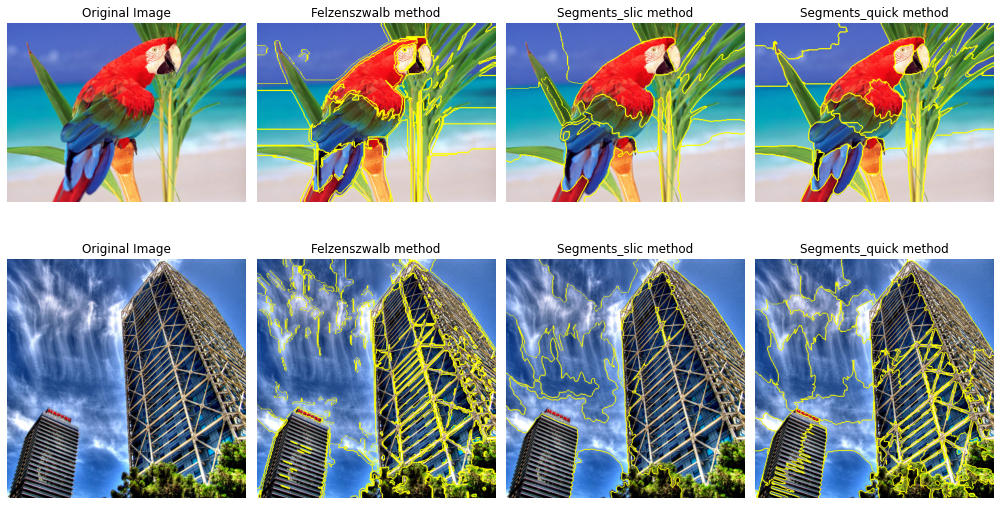

In [12]:
# Let's read the images
img1 = io.imread("images/loro.png")
img2 = io.imread("images/mapfre.jpg")

# Let's to apply the algorithms 
segments_fz1 = felzenszwalb(img1, scale=300, sigma=2, min_size=20)
segments_fz2 = felzenszwalb(img2, scale=300, sigma=2, min_size=20)
# default scale=1, sigma=0.8, min_size=20

segments_slic1 = slic(img1, n_segments=20, compactness=10, sigma=2)
segments_slic2 = slic(img2, n_segments=20, compactness=10, sigma=2)
# default n_segments=100, compactness=10.0, max_num_iter=10, sigma=0

segments_quick1 = quickshift(img1, kernel_size=10, max_dist=50, ratio=2, sigma=2)
segments_quick2 = quickshift(img2, kernel_size=10, max_dist=50, ratio=2, sigma=2)
# default kernel_size=5, max_dist=10, ratio=1.0, sigma=0

# To visualize the images
fig, axes = plt.subplots(2, 4, figsize=(14, 8))
ax = axes.ravel()

ax[0].imshow(img1)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(mark_boundaries(img1, segments_fz1))
ax[1].set_title('Felzenszwalb method')
ax[1].axis('off')
ax[2].imshow(mark_boundaries(img1, segments_slic1))
ax[2].set_title('Segments_slic method')
ax[2].axis('off')
ax[3].imshow(mark_boundaries(img1, segments_quick1))
ax[3].set_title('Segments_quick method')
ax[3].axis('off')
ax[4].imshow(img2)
ax[4].set_title('Original Image')
ax[4].axis('off')
ax[5].imshow(mark_boundaries(img2, segments_fz2))
ax[5].set_title('Felzenszwalb method')
ax[5].axis('off')
ax[6].imshow(mark_boundaries(img2, segments_slic2))
ax[6].set_title('Segments_slic method')
ax[6].axis('off')
ax[7].imshow(mark_boundaries(img2, segments_quick2))
ax[7].set_title('Segments_quick method')
ax[7].axis('off')

plt.tight_layout()
plt.show()

In [13]:
# As we can see, the segmentation is different for each image, 
# and also the parameters need to be refinated for each image to obtain a better result.